In [6]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [8]:
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('SELECT * FROM heartdisease',con=engine2)
engine2.dispose()

In [9]:
import numpy as np

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)
# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(X_std)

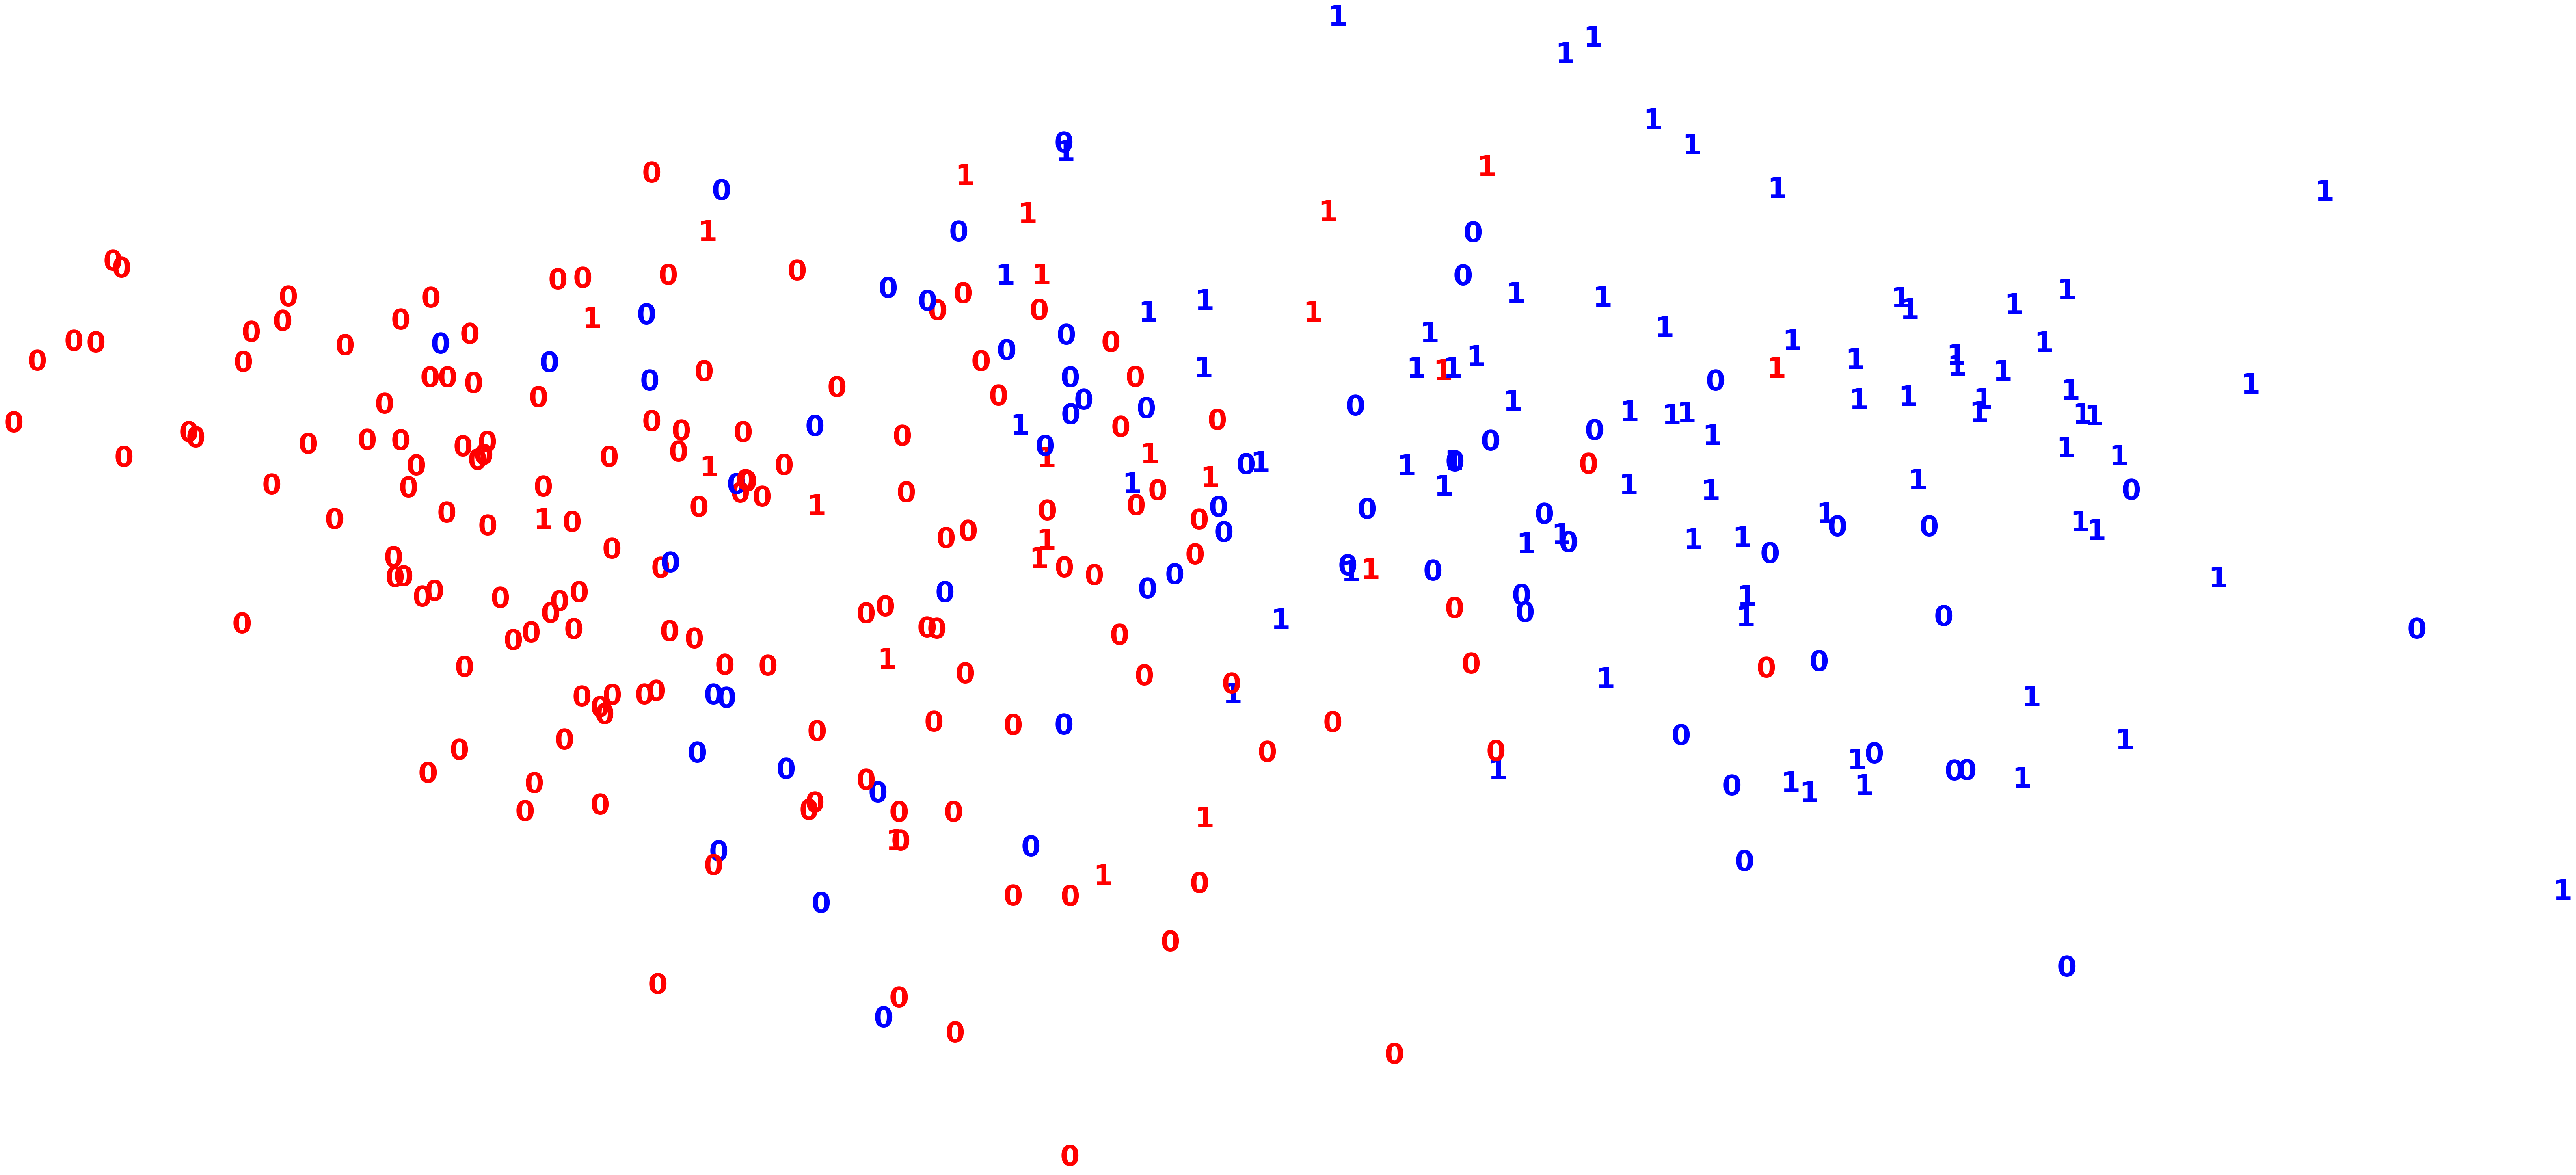

In [11]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [12]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445


## k means was better compared to this clustering as below are from knn
running with 2 groups
silhouette_score: 0.17440650461256252
random index: 0.7183560317704781

In [16]:

pd.crosstab(y,clusters)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
           ^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
            ^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.p

col_0   0    1
row_0         
0      97   67
1      15  124

In [15]:

for covariance_type in ['full','tied','diag','spherical']:
 # Defining the agglomerative clustering
 gmm_cluster = GaussianMixture(covariance_type=covariance_type,n_components=2, random_state=123)
 # Fit model
 clusters = gmm_cluster.fit_predict(X_std)
 print(f'covariance_type is {covariance_type}')
 print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
 print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

covariance_type is full
Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445
covariance_type is tied
Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445
covariance_type is diag
Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445
covariance_type is spherical
Adjusted Rand Index of the GMM solution: 0.20765243525722468
The silhouette score of the GMM solution: 0.12468753110276876
